# Rainfall Prediction - Weather Forecasting
### Problem Statement:
## Rain Prediction –Weather forecasting
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

### 1. Problem Statement:
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

## Dataset Description:
Number of columns: 23

Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

### Dataset available below
#### Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv

https://github.com/dsrscientist/dataset3

# Importing Required Libs`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
pd.set_option('display.max_columns',None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# getting the shape
df.shape

(8425, 23)

data has 8425 rows and 23 columns

In [4]:
# columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

There are 23 columns in the dataset including target column

In [5]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [6]:
# checking datatypes
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
# checking null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
# getting info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

The dataset is mixture of, object type of data and float type of data.

## Stats summary

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


1. in data set min temp is -2 and max temp is 28.5
2. in data set max temp almost 24 and highest max tempis 45.5

## Segregating the data

In [10]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [11]:
## Handling missing values
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [12]:
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [13]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [14]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Checking correlation

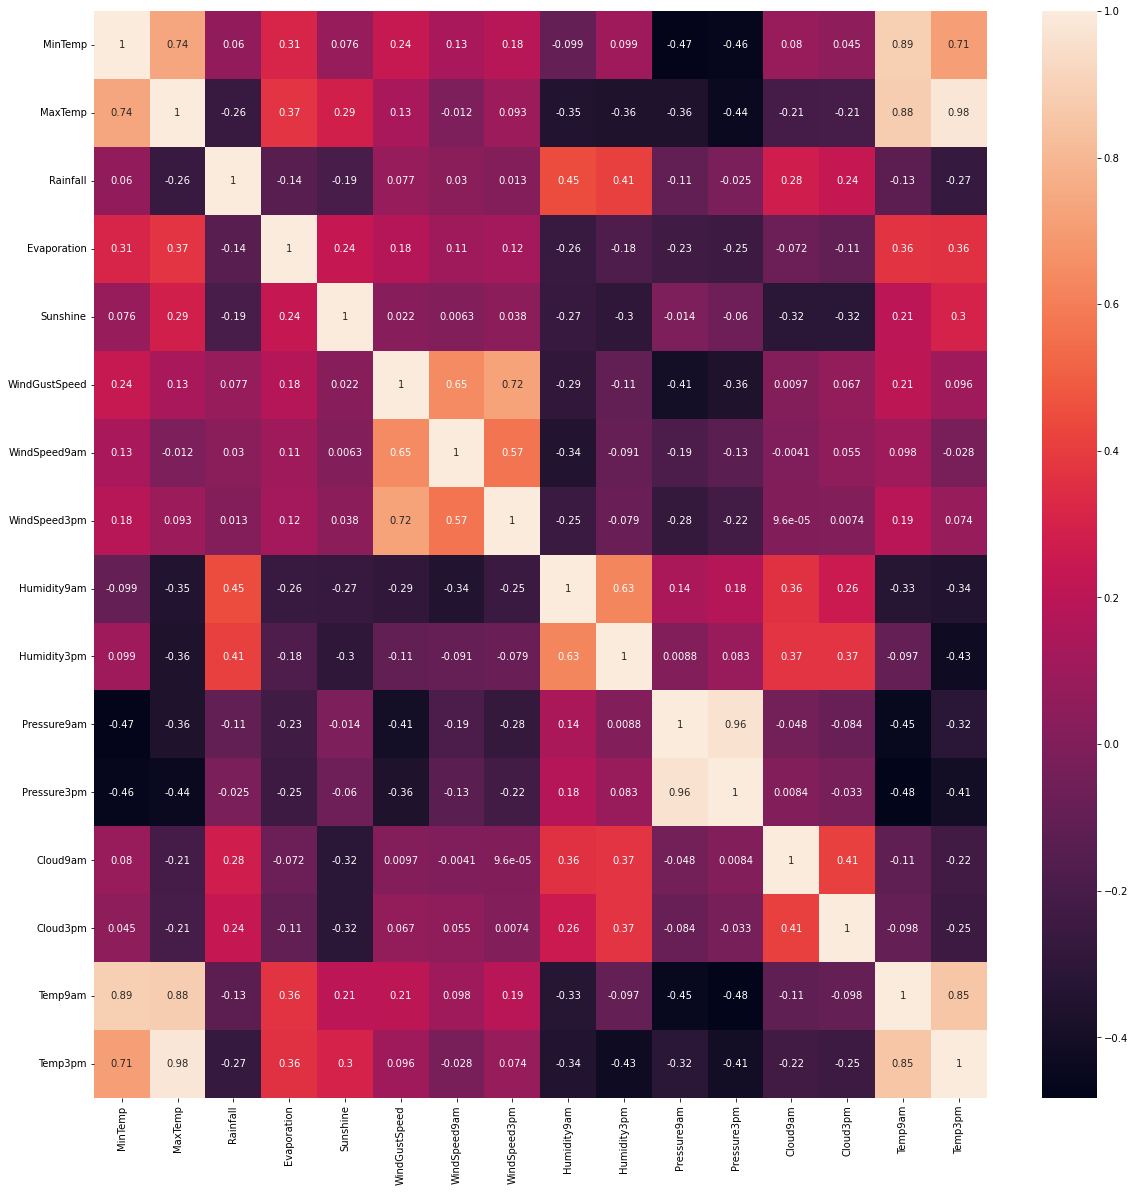

In [15]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True);

## Data Distribution

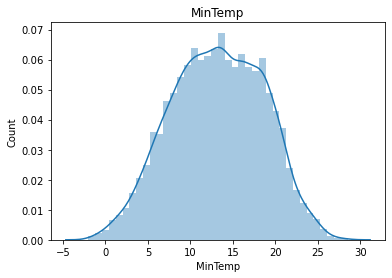

<Figure size 1080x1080 with 0 Axes>

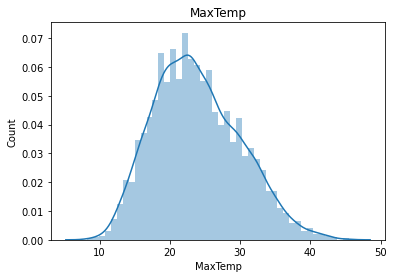

<Figure size 1080x1080 with 0 Axes>

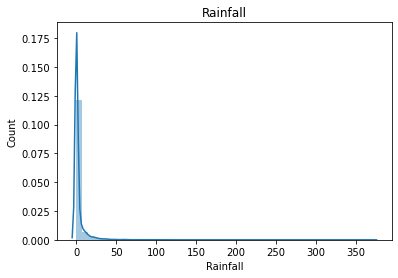

<Figure size 1080x1080 with 0 Axes>

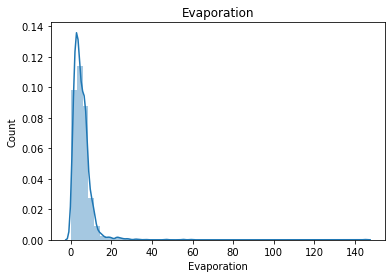

<Figure size 1080x1080 with 0 Axes>

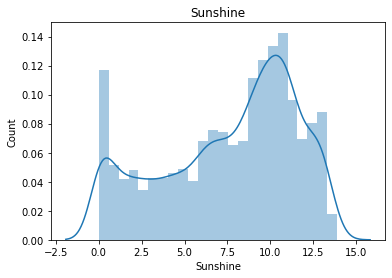

<Figure size 1080x1080 with 0 Axes>

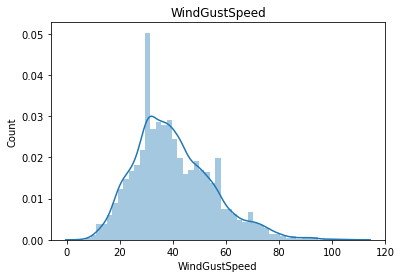

<Figure size 1080x1080 with 0 Axes>

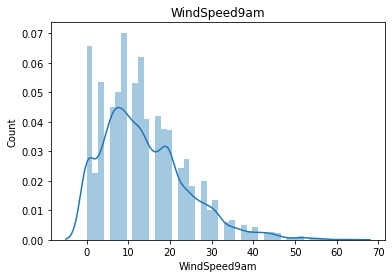

<Figure size 1080x1080 with 0 Axes>

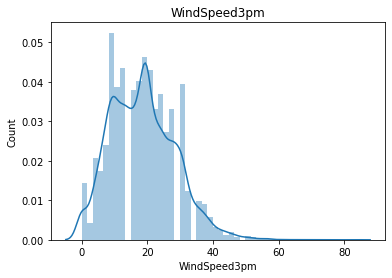

<Figure size 1080x1080 with 0 Axes>

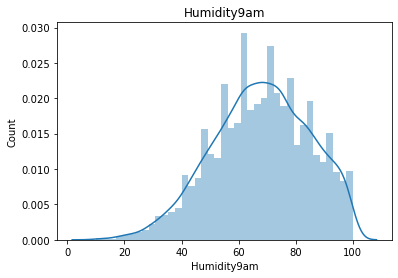

<Figure size 1080x1080 with 0 Axes>

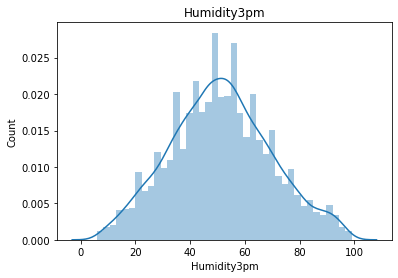

<Figure size 1080x1080 with 0 Axes>

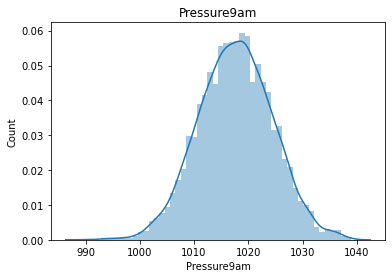

<Figure size 1080x1080 with 0 Axes>

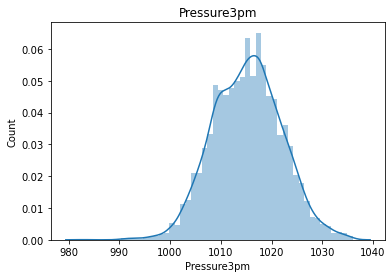

<Figure size 1080x1080 with 0 Axes>

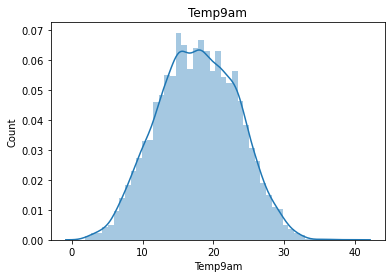

<Figure size 1080x1080 with 0 Axes>

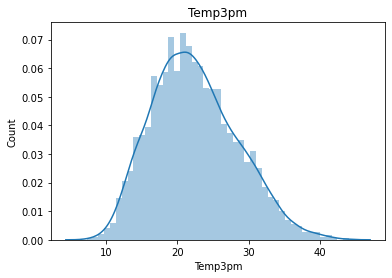

<Figure size 1080x1080 with 0 Axes>

In [16]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

some features have skewness
## Plotting BOx plot for outliers

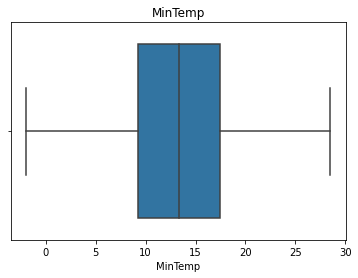

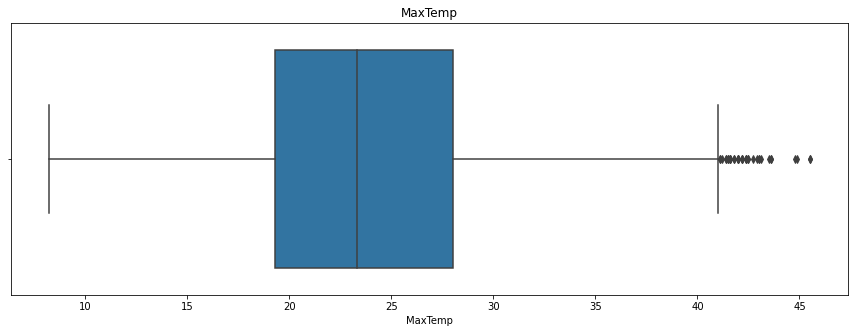

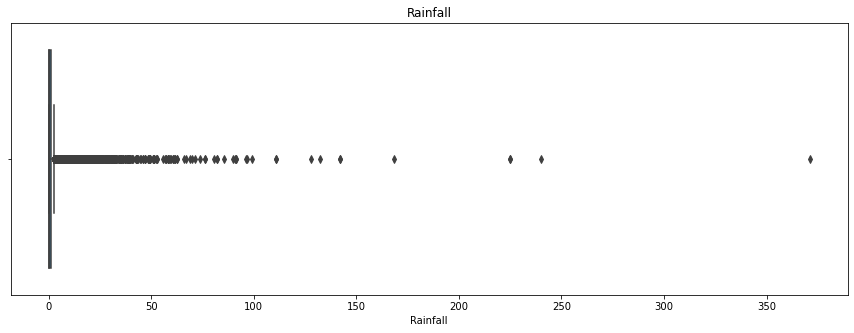

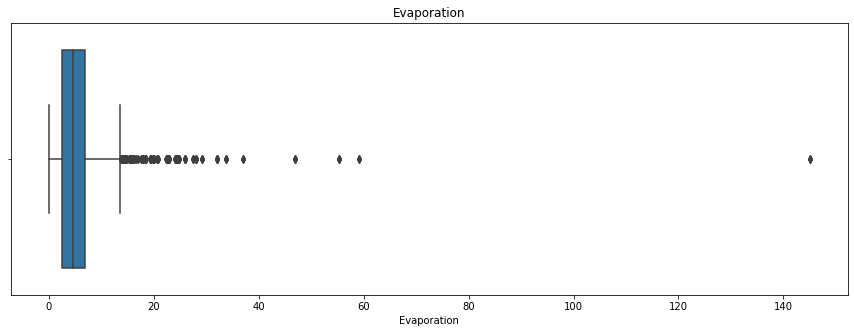

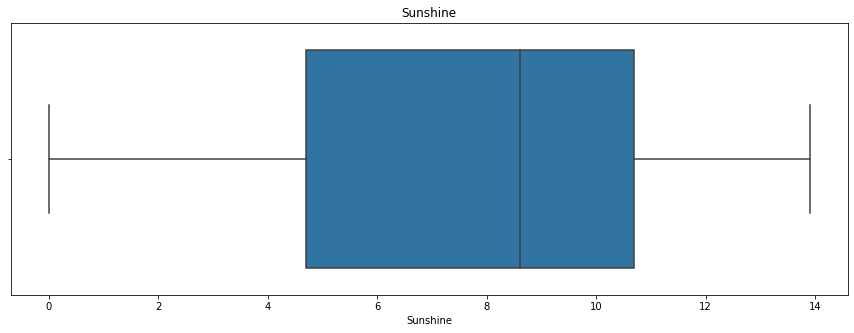

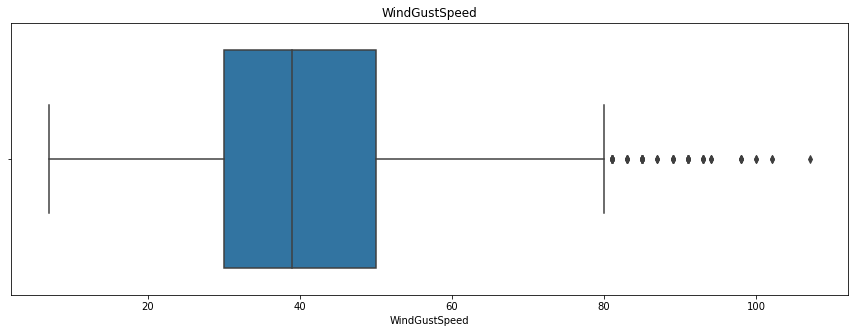

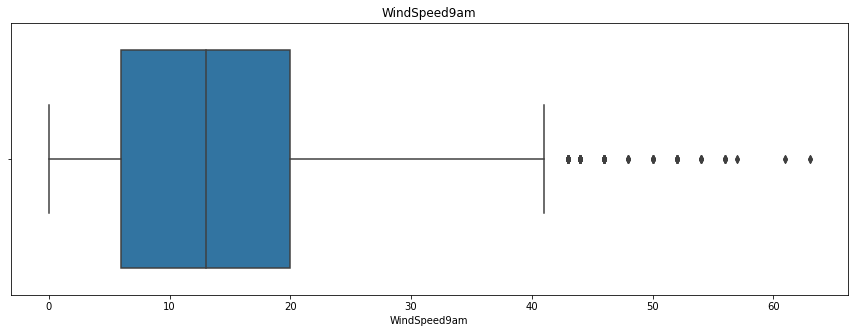

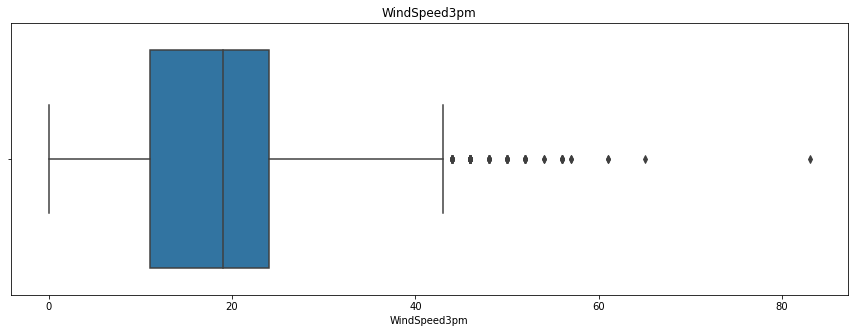

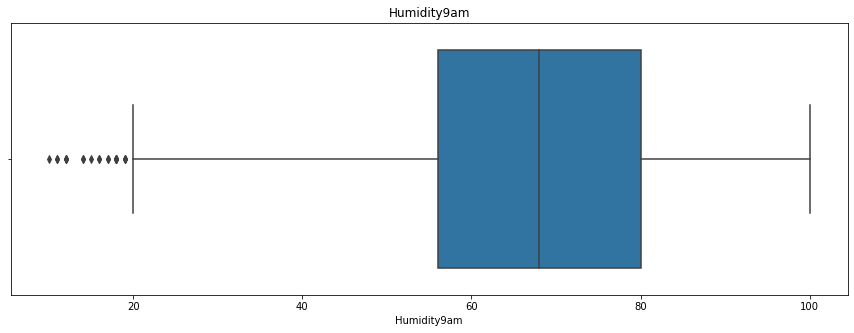

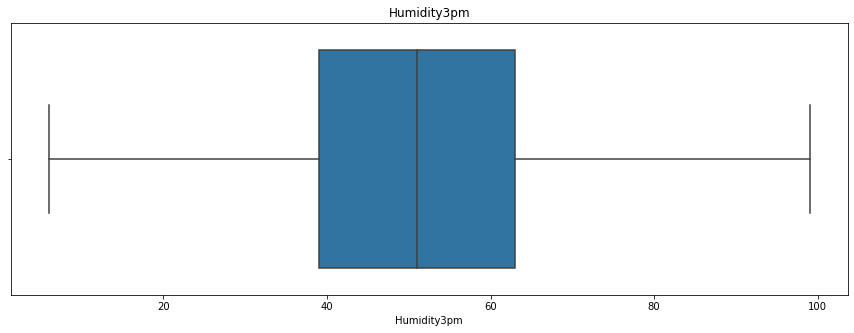

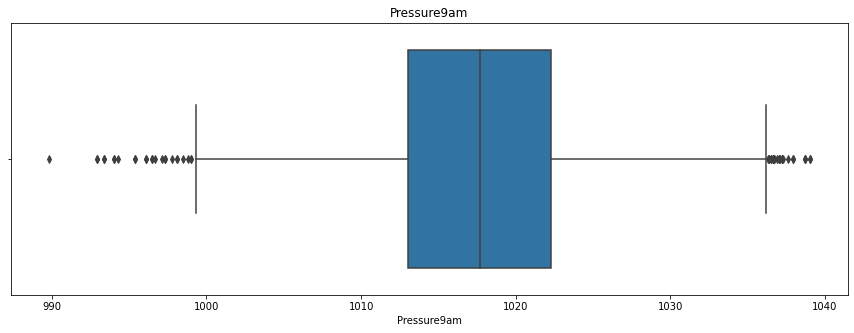

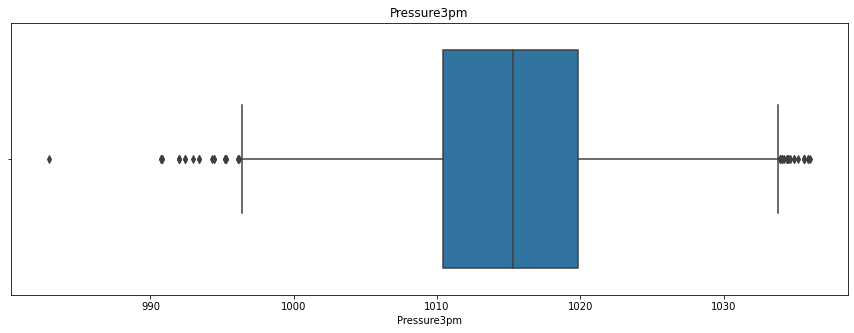

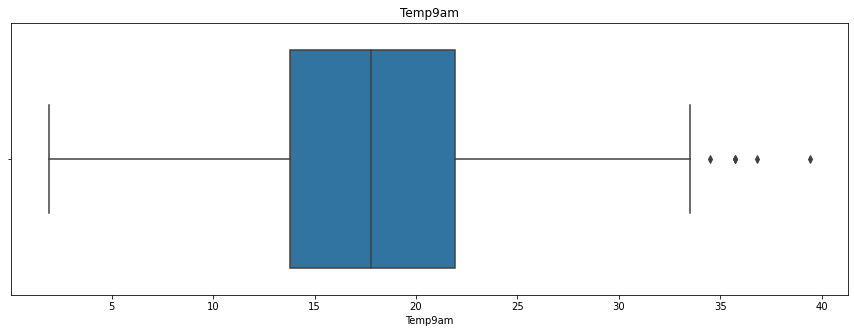

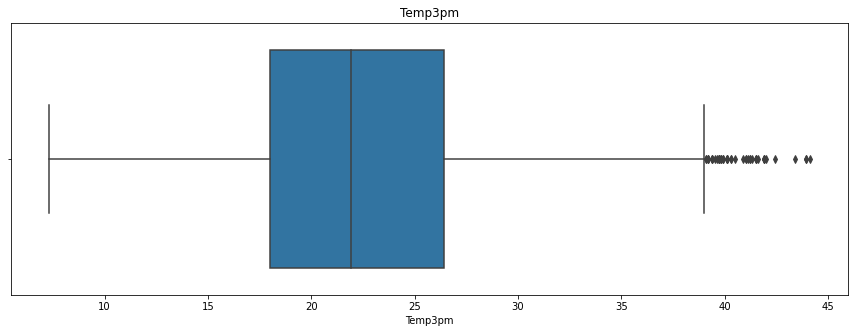

<Figure size 1080x360 with 0 Axes>

In [17]:
#for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,5));
    

there is more outliers present in the data

In [18]:
#filling null values in continuous features
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [19]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [20]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [21]:
# filling discreate features columns null values using MODE

def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

## Encoding

In [22]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [23]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [24]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [25]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [26]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

Now there is no missing values present in dataset

In [27]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow,0,1
Location,,
Adelaide,160.0,45.0
Albury,708.0,199.0
Brisbane,444.0,135.0
CoffsHarbour,425.0,186.0
Darwin,218.0,32.0
Melbourne,1216.0,406.0
Newcastle,624.0,198.0
Penrith,366.0,116.0
PerthAirport,962.0,242.0


In [28]:
df1[1].sort_values(ascending = False)

Location
Melbourne       406.0
Williamtown     306.0
PerthAirport    242.0
Albury          199.0
Newcastle       198.0
CoffsHarbour    186.0
Brisbane        135.0
Wollongong      126.0
Penrith         116.0
Adelaide         45.0
Darwin           32.0
Uluru             NaN
Name: 1, dtype: float64

In [29]:
df1[1].sort_values(ascending = False).index

Index(['Melbourne', 'Williamtown', 'PerthAirport', 'Albury', 'Newcastle',
       'CoffsHarbour', 'Brisbane', 'Wollongong', 'Penrith', 'Adelaide',
       'Darwin', 'Uluru'],
      dtype='object', name='Location')

In [30]:
len(df1[1].sort_values(ascending = False).index)

12

In [31]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [32]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [33]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,49,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0,6,21
8421,2017-06-22,49,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0,6,22
8422,2017-06-23,49,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0,6,23
8423,2017-06-24,49,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


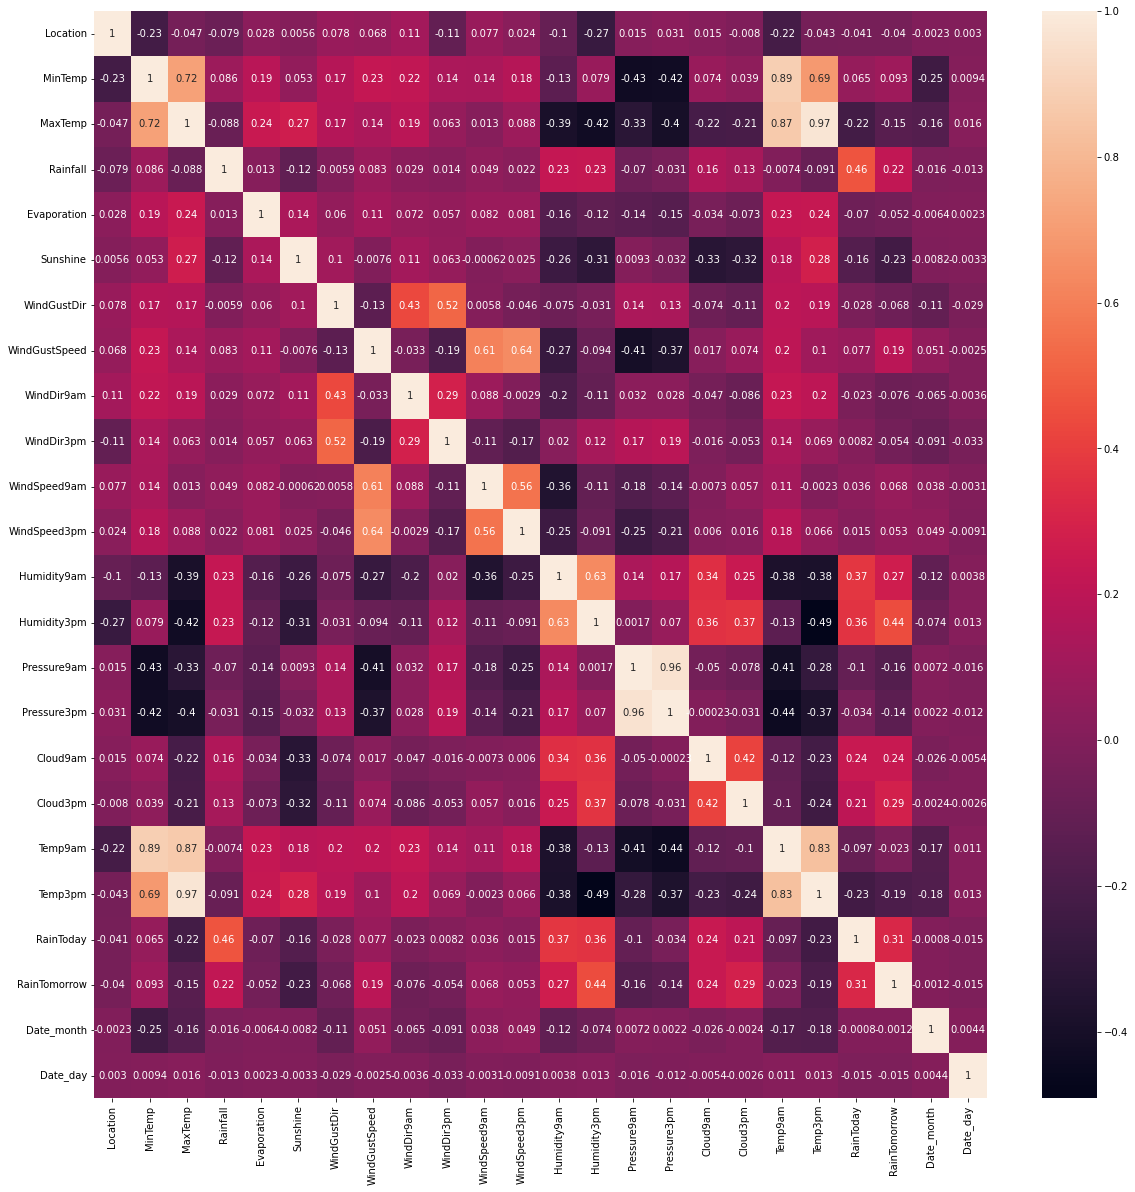

In [34]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True);

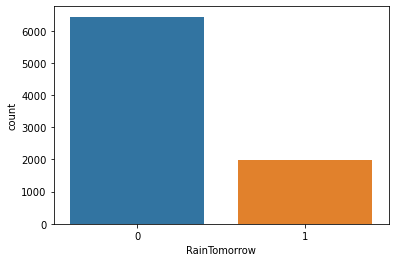

In [35]:
sns.countplot(df["RainTomorrow"]);

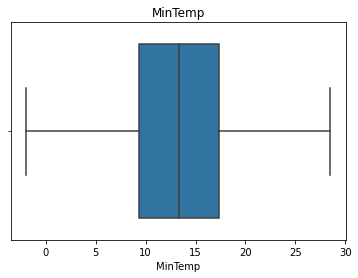

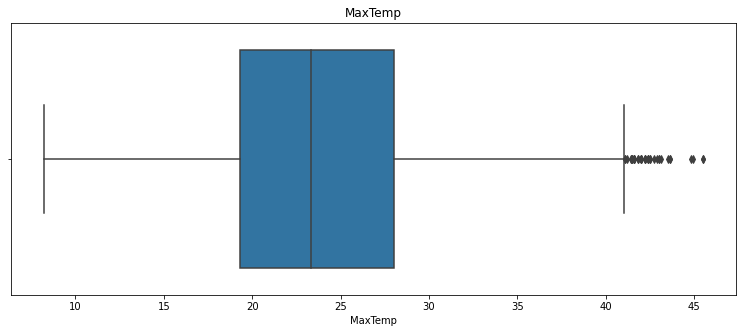

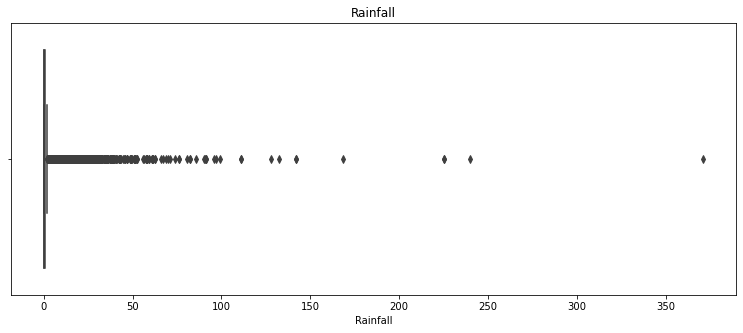

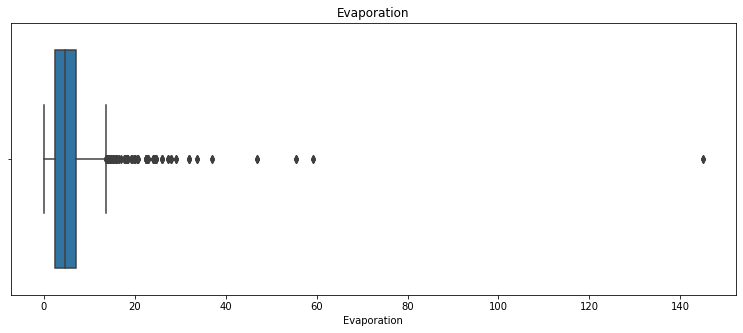

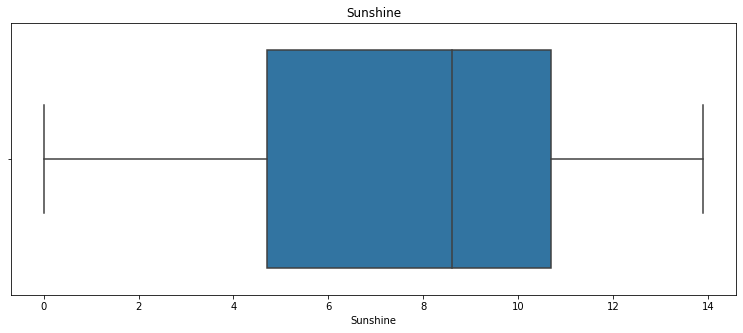

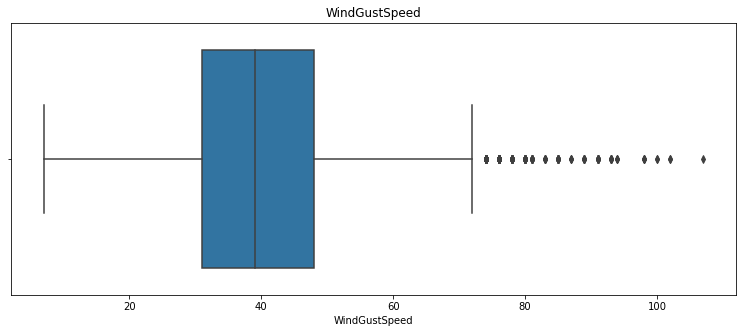

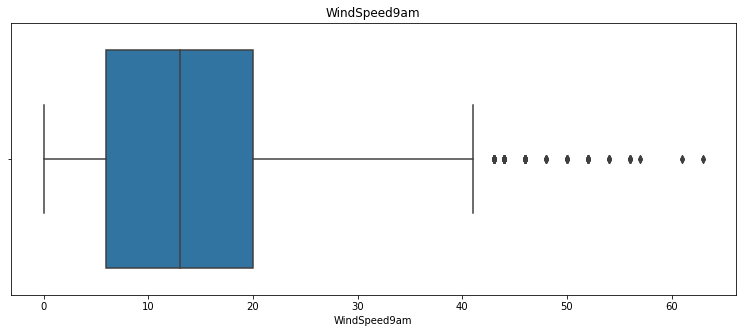

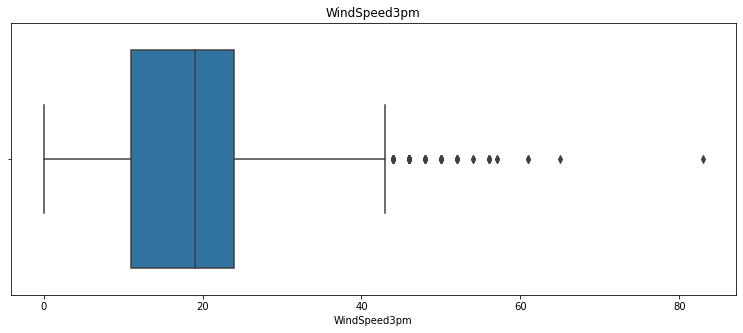

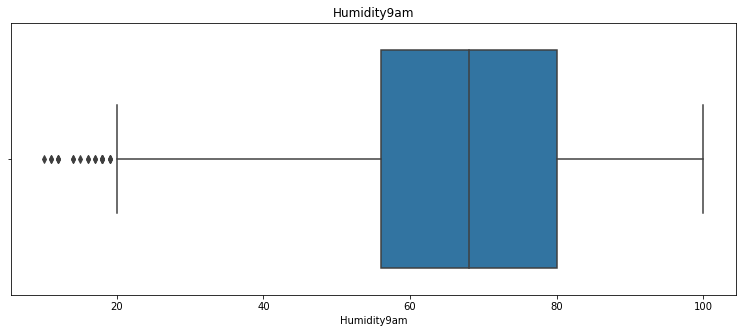

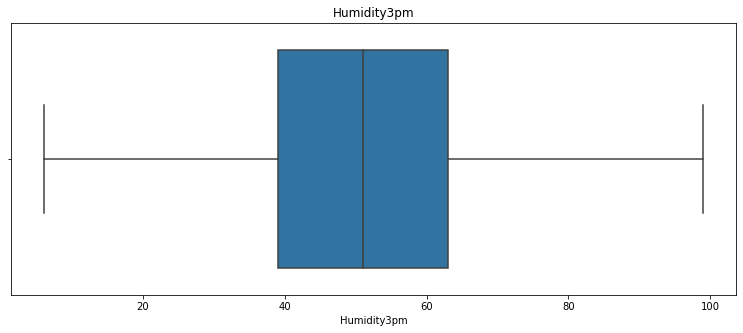

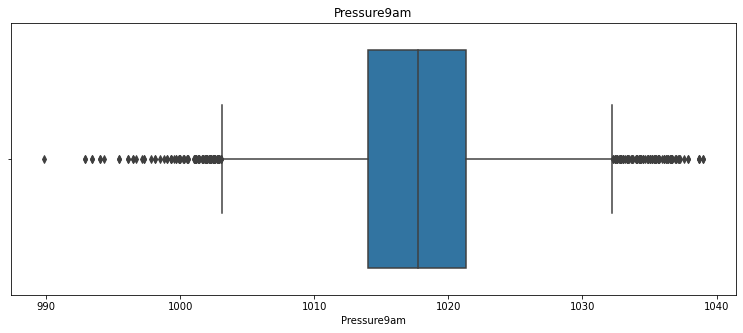

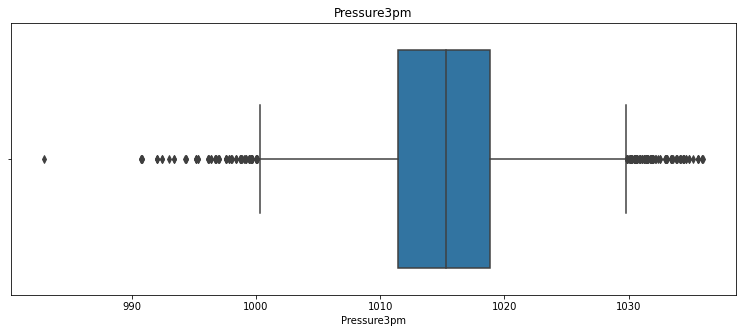

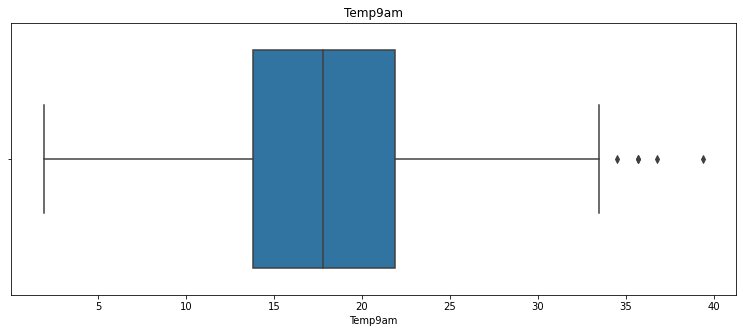

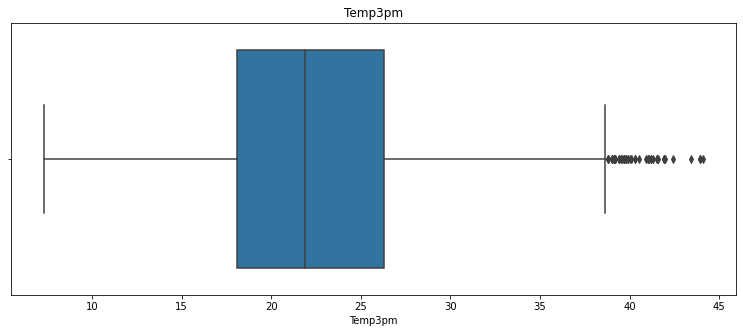

<Figure size 936x360 with 0 Axes>

In [36]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(13,5));

In [37]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


# Removing Outliers

In [38]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.6999999999999993 29.3


In [39]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [40]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [41]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [42]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [43]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [44]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [45]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [46]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [47]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [48]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [49]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [50]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [51]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [52]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [53]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [54]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1003.0500000000001 1032.25


In [55]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [56]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1000.3 1029.8999999999999


In [57]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [58]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [59]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [60]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.8000000000000025 38.6


In [61]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

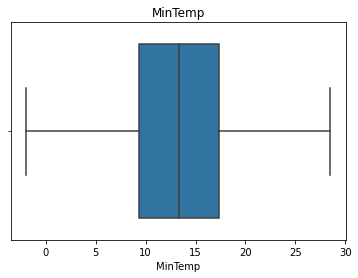

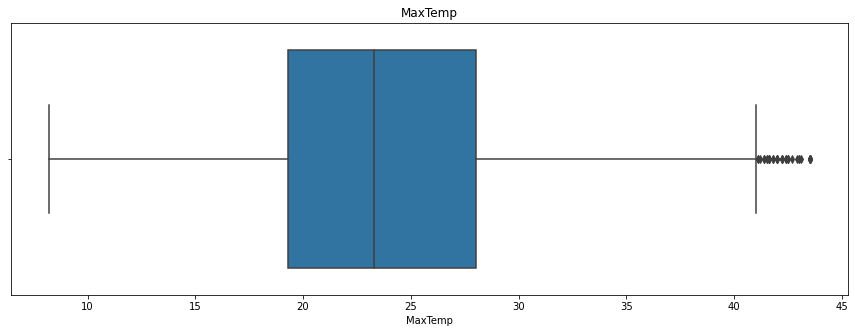

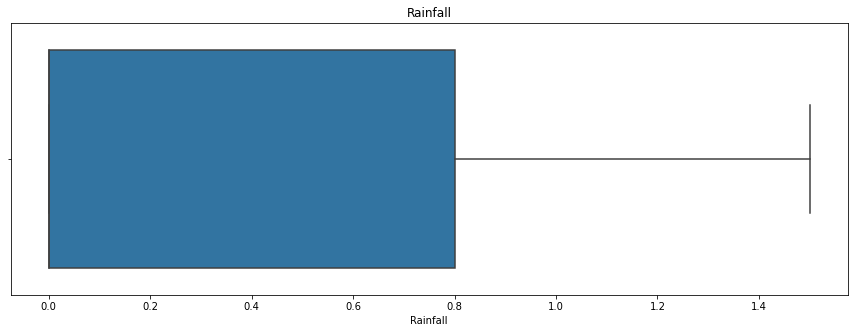

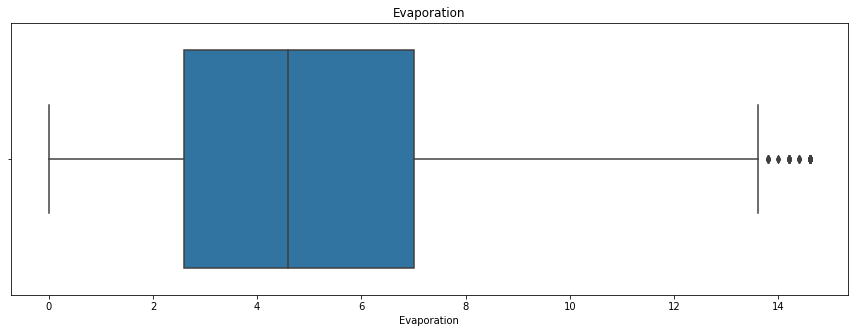

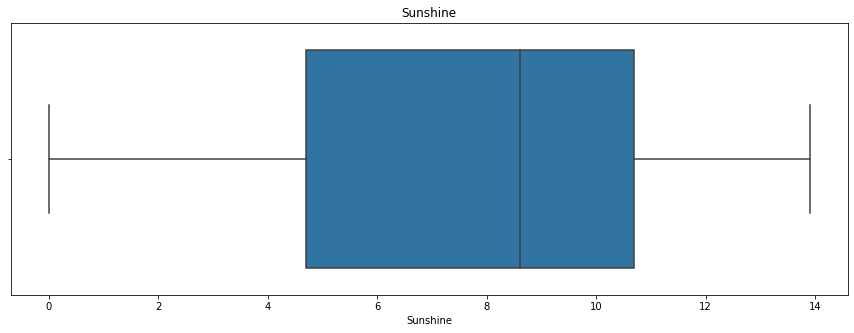

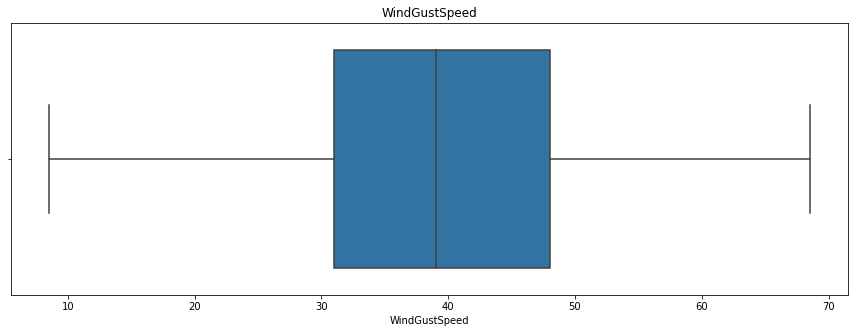

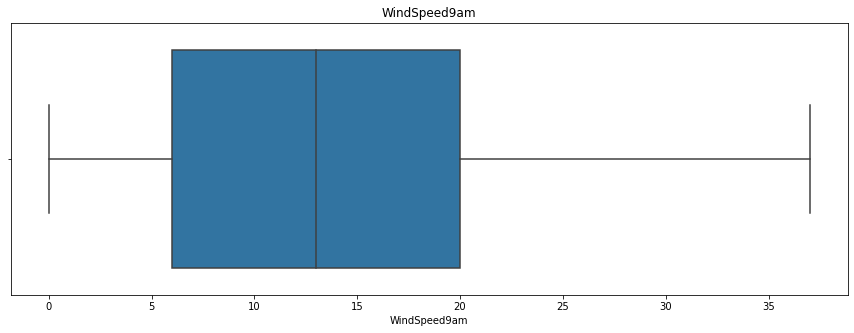

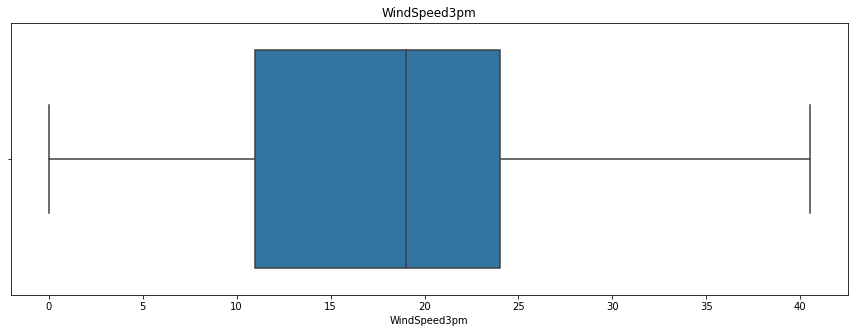

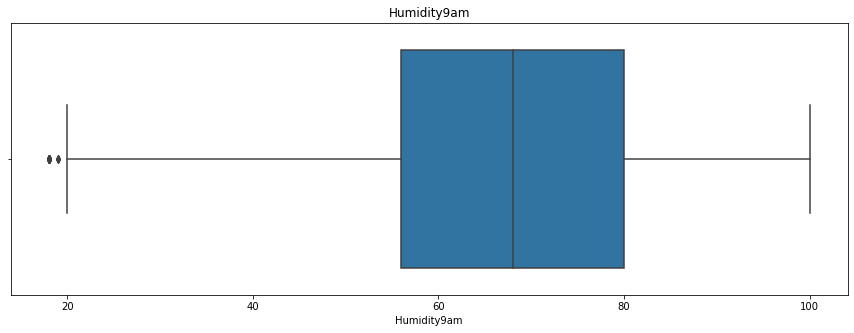

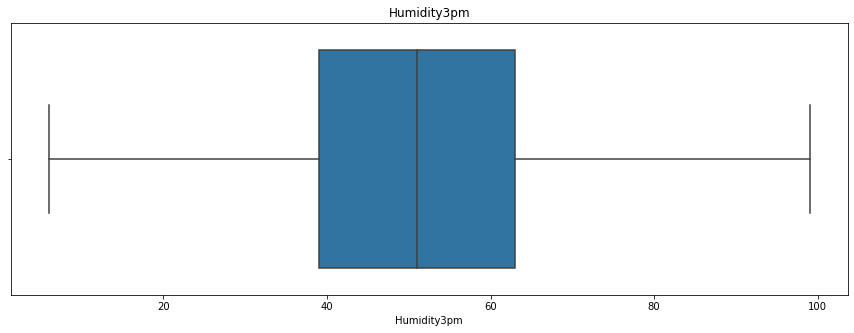

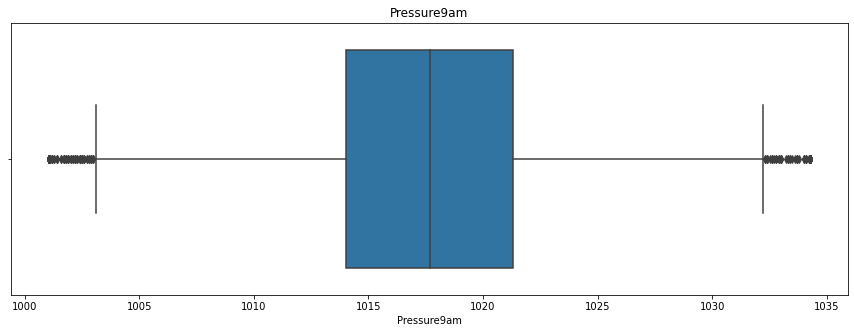

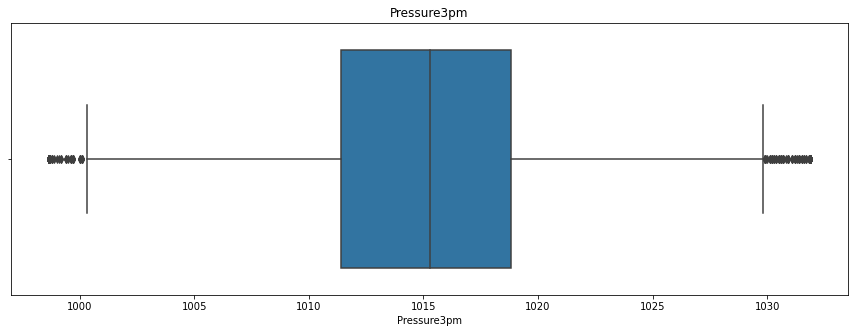

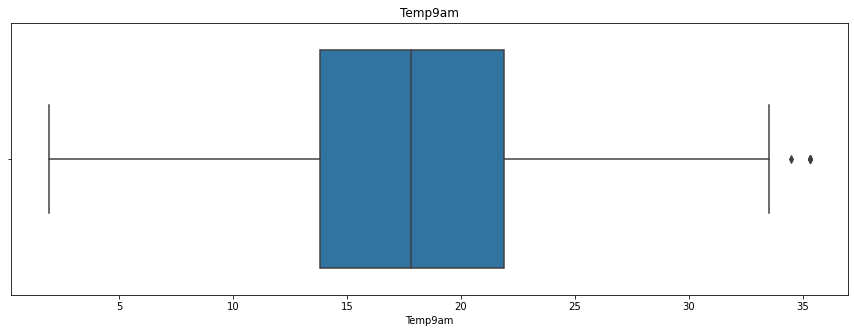

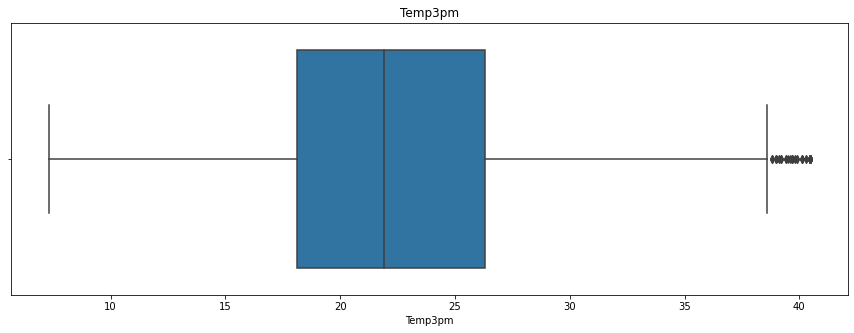

<Figure size 1080x360 with 0 Axes>

In [62]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,5));

sucessfully remove outliers as possible

In [63]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show();

MinTemp


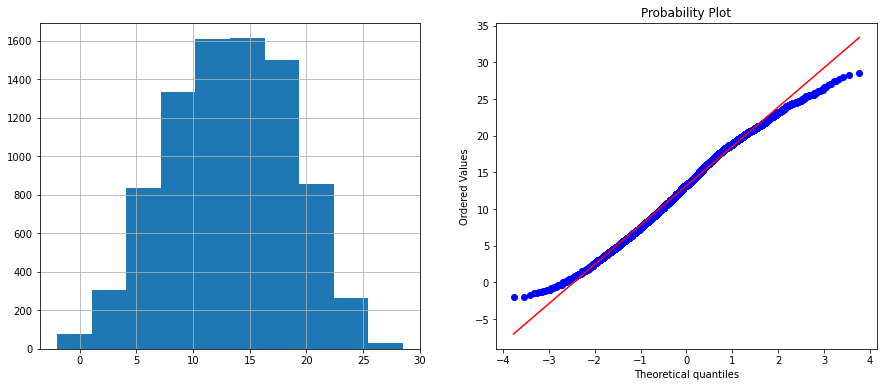

MaxTemp


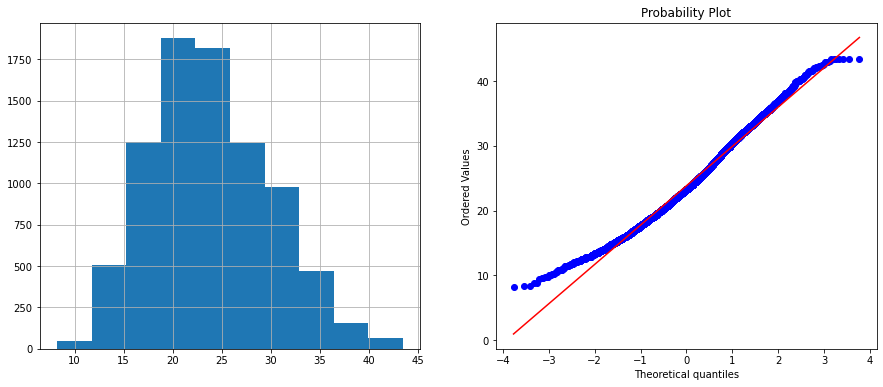

Rainfall


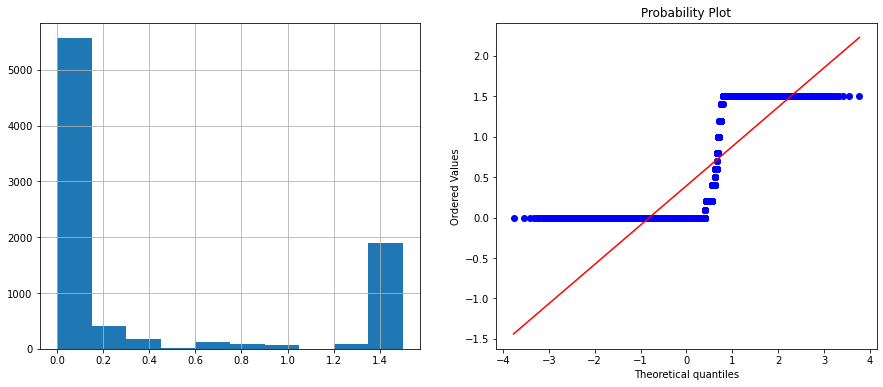

Evaporation


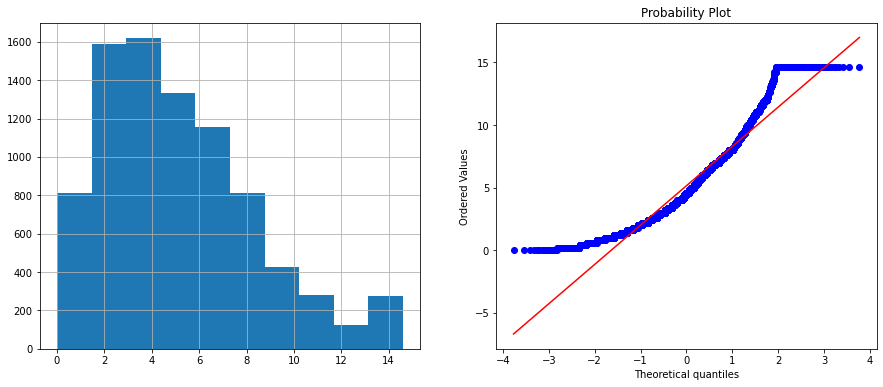

Sunshine


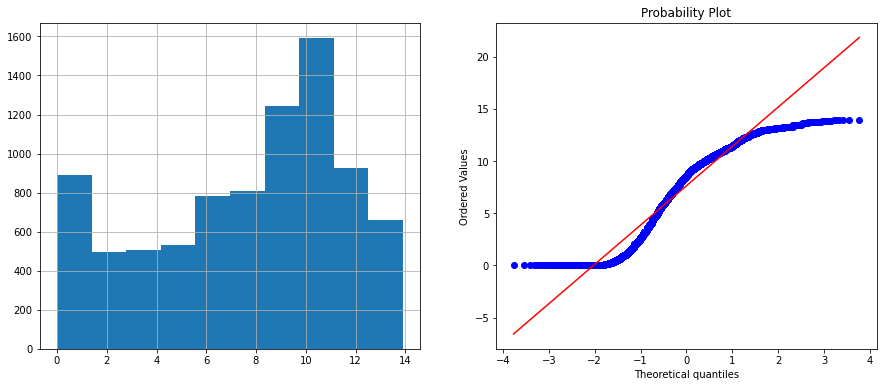

WindGustSpeed


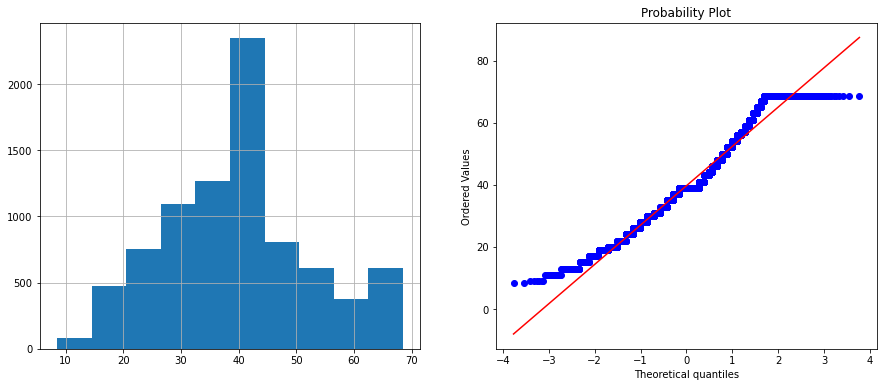

WindSpeed9am


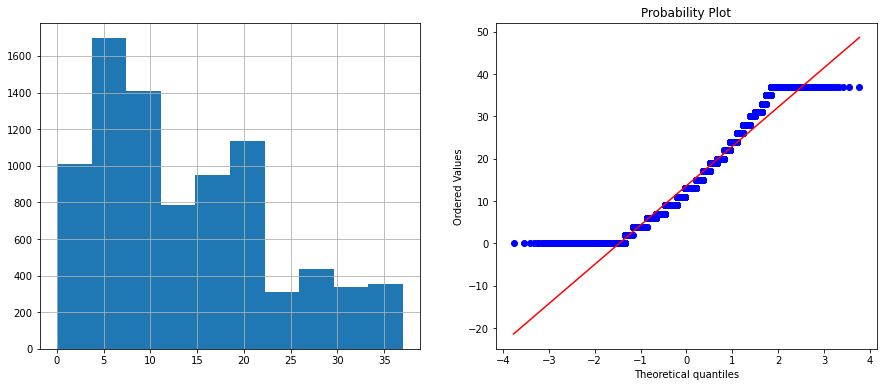

WindSpeed3pm


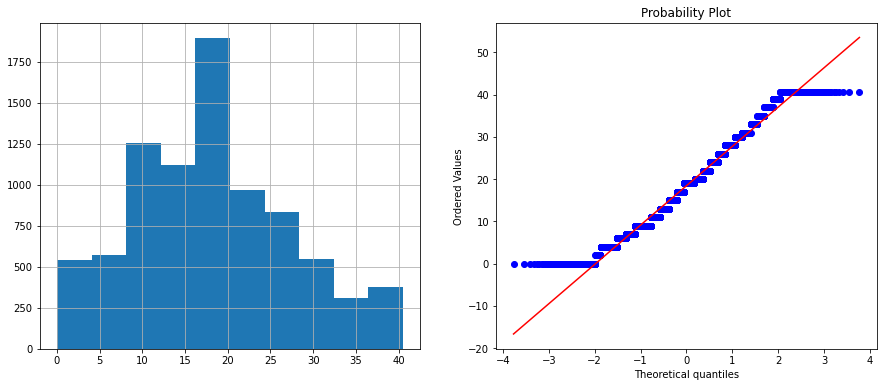

Humidity9am


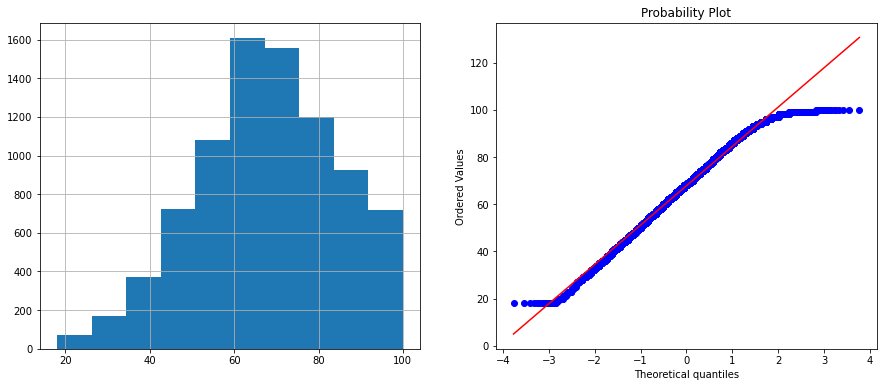

Humidity3pm


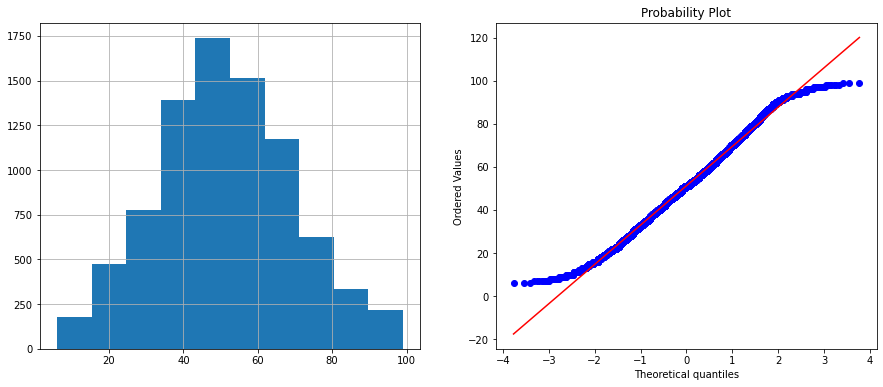

Pressure9am


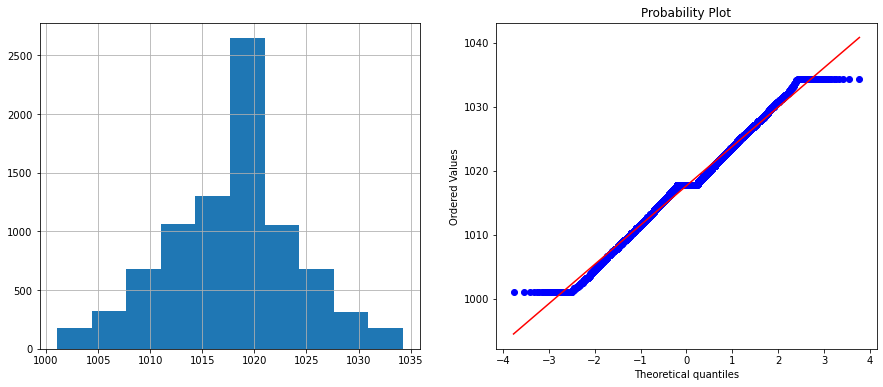

Pressure3pm


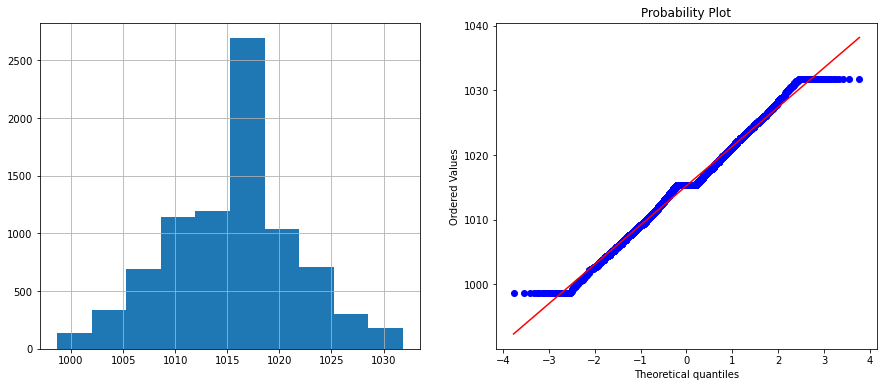

Temp9am


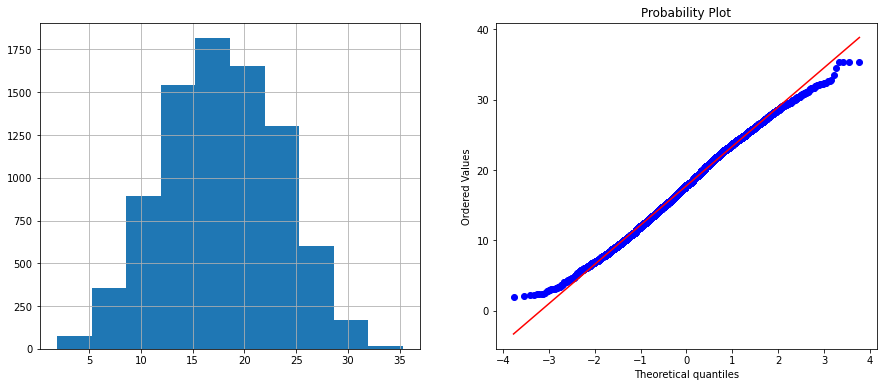

Temp3pm


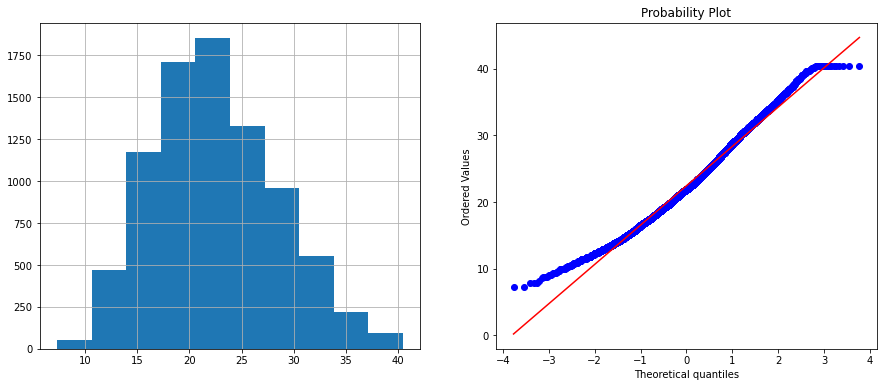

In [64]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show();

In [65]:
df.to_csv("preprocessed_1.csv", index=False)

In [66]:
x = df.drop(["RainTomorrow", "Date"], axis=1)
y = df["RainTomorrow"]
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,30,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,12,1
1,30,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,12,2
2,30,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,12,3
3,30,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,12,4
4,30,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,49,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,6,21
8421,49,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,6,22
8422,49,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,6,23
8423,49,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,6,24


## Standard Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,0.697597,0.038248,-0.156288,0.328811,-0.662619,1.582770,-0.681815,0.335273,-0.278307,-1.124722,0.667323,0.592732,0.189201,-1.597239,-1.610482,-1.331695,1.188369,1.283648,-0.153693,-0.106696,-0.556099,1.616696,-1.677733
1,0.697597,-1.077164,0.203684,-0.631075,-0.909043,-0.007275,-1.134477,0.335273,-1.365745,-0.433496,-1.010976,0.379826,-1.422547,-1.433401,-1.141264,-1.217361,-1.244683,-0.182260,-0.100173,0.314589,-0.556099,1.616696,-1.563926
2,0.697597,-0.054703,0.301858,-0.631075,-0.169770,0.018371,-0.455483,0.490926,-0.278307,-0.433496,0.562430,0.805639,-1.780714,-1.160339,-1.626662,-1.070361,-0.897104,-0.915214,0.577746,0.129224,-0.556099,1.616696,-1.450120
3,0.697597,-0.742540,0.678192,-0.631075,-1.032255,0.095308,0.902505,-1.221256,1.461594,1.409772,-0.276720,-1.004065,-1.362853,-1.924914,-0.008669,-0.400695,1.188369,0.917171,0.060387,0.685320,-0.556099,1.616696,-1.336313
4,0.697597,0.800447,1.381773,0.968734,-0.416194,1.095498,-0.681815,0.101793,1.244107,-1.815947,-0.696295,0.166920,0.845839,-0.996501,-1.108904,-1.511361,0.840790,1.283648,0.006867,1.224565,-0.556099,1.616696,-1.222506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,3.256144,-1.932313,-0.074476,-0.631075,0.384685,-1.648612,1.807830,-0.676471,1.461594,1.179363,-0.066933,-0.791158,-1.004687,-1.488014,1.123926,0.824305,1.188369,-0.182260,-1.366811,-0.005587,-0.556099,-0.128611,0.598400
8421,3.256144,-1.783591,0.236408,-0.631075,2.294475,-0.135505,-1.587140,-1.376909,1.461594,-1.355130,-0.066933,-1.004065,-0.706215,-1.651851,0.945947,0.628305,-1.244683,-1.281691,-1.224092,0.348292,-0.556099,-0.128611,0.712207
8422,3.256144,-1.448968,0.498206,-0.631075,-0.292982,1.377603,-0.908146,-0.209512,1.461594,-1.124722,-0.486508,-1.004065,-0.885298,-1.488014,0.541449,0.252638,0.493211,0.184217,-0.938652,0.617914,-0.556099,-0.128611,0.826013
8423,3.256144,-1.002803,0.514568,-0.631075,-0.354588,1.403248,1.128836,-0.909951,1.026619,-1.355130,-0.066933,-1.216971,-1.004687,-1.488014,0.282570,0.203638,-0.549525,-0.915214,-0.474812,0.601063,-0.556099,-0.128611,0.939820


## Feature Importance

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [69]:
print(extra.feature_importances_)

[0.03572013 0.03689494 0.03683749 0.04734869 0.03288547 0.04486906
 0.03409222 0.0517964  0.03275627 0.0341381  0.03670639 0.03780247
 0.05118114 0.12023728 0.03891105 0.04093163 0.03965003 0.05709856
 0.03532204 0.03954082 0.04557595 0.03420368 0.03550019]


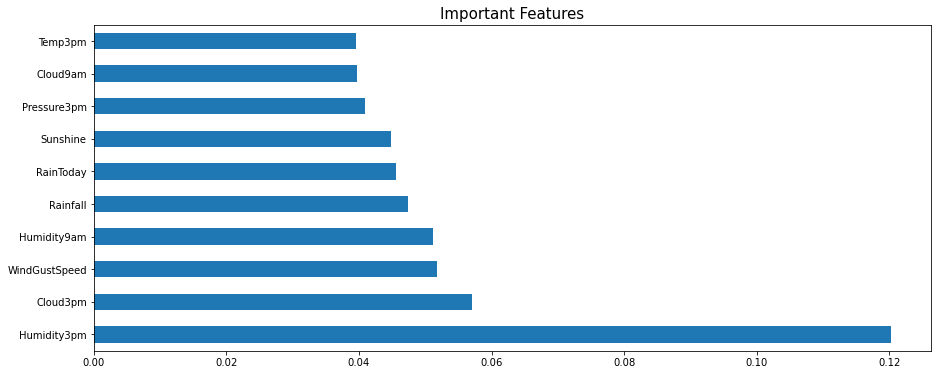

In [70]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

* We could see Humidity 3PM is most important feature in our dataset to predict the claim.

## Model Building

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc,plot_roc_curve
from imblearn.combine import SMOTEENN

In [72]:
#over sampling of our Data
sm=SMOTEENN()
x_resample,y_resample=sm.fit_resample(x,y)
x_resample

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,0.697597,0.038248,-0.156288,0.328811,-0.662619,1.582770,-0.681815,0.335273,-0.278307,-1.124722,0.667323,0.592732,0.189201,-1.597239,-1.610482,-1.331695,1.188369,1.283648,-0.153693,-0.106696,-0.556099,1.616696,-1.677733
1,0.697597,-1.077164,0.203684,-0.631075,-0.909043,-0.007275,-1.134477,0.335273,-1.365745,-0.433496,-1.010976,0.379826,-1.422547,-1.433401,-1.141264,-1.217361,-1.244683,-0.182260,-0.100173,0.314589,-0.556099,1.616696,-1.563926
2,0.697597,-0.054703,0.301858,-0.631075,-0.169770,0.018371,-0.455483,0.490926,-0.278307,-0.433496,0.562430,0.805639,-1.780714,-1.160339,-1.626662,-1.070361,-0.897104,-0.915214,0.577746,0.129224,-0.556099,1.616696,-1.450120
3,0.697597,-0.742540,0.678192,-0.631075,-1.032255,0.095308,0.902505,-1.221256,1.461594,1.409772,-0.276720,-1.004065,-1.362853,-1.924914,-0.008669,-0.400695,1.188369,0.917171,0.060387,0.685320,-0.556099,1.616696,-1.336313
4,0.697597,0.205560,0.187321,-0.631075,-1.155468,0.197892,-0.681815,0.802231,0.156669,-0.894313,0.667323,0.592732,-1.124075,-1.761076,-1.303064,-1.152028,-1.244683,0.550694,0.060387,0.365143,-0.556099,1.616696,-0.994893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,0.428276,-0.724889,-1.219028,-0.631075,-1.234019,-1.522953,-0.523364,1.049316,-0.593637,-0.900040,0.176921,1.428394,0.556319,0.802996,-0.523183,-0.527667,0.640940,-1.070974,-1.073789,-1.242483,-0.556099,-0.252243,-0.161285
10256,-0.783667,1.130295,0.376277,0.454116,-0.156417,-0.708918,-0.908146,-0.053860,-1.148257,0.488138,-1.430551,-1.004065,0.720905,0.734188,0.007511,0.007638,0.514737,0.573390,0.911019,0.544461,-0.556099,-1.301156,-1.646017
10257,0.428276,-0.732783,-1.625013,0.247494,-0.969628,-1.341711,-0.455483,0.398479,-0.495794,-0.261644,-0.013617,0.596261,0.890363,1.584165,0.543952,0.774493,-0.897104,0.917171,-1.242227,-1.746123,-0.556099,-0.054684,-0.481820
10258,0.808875,0.007036,-1.044679,1.768638,0.884345,-1.669532,0.595169,1.113537,0.948780,0.553619,-0.494239,0.710955,1.440583,1.568273,-1.332361,-1.054028,0.840790,1.034828,-0.534249,-1.325765,1.798240,0.463878,-1.490851


In [73]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.20,random_state=i,stratify=y_resample) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

## Logistic Regression

max accuracy score corresponding to 73 is 86.20857699805067


cross validation score 82.39762611275964


Standard Deviation 3.089384187483515


F1 score 87.50000000000001


Training accuracy 84.770955165692


Test Accuracy 85.38011695906432


Confusion Matrix [[ 702  149]
 [ 151 1050]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       851
           1       0.88      0.87      0.88      1201

    accuracy                           0.85      2052
   macro avg       0.85      0.85      0.85      2052
weighted avg       0.85      0.85      0.85      2052



Roc_auc Score 84.95916544282038





73

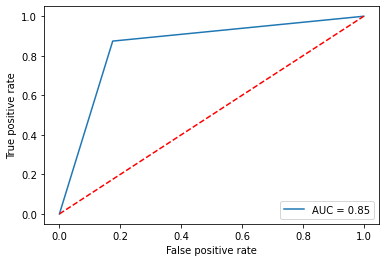

In [74]:
lr = LogisticRegression()
max_accuracy_score(lr,x,y)

## Decision Tree

max accuracy score corresponding to 63 is 92.00779727095517


cross validation score 77.88724035608308


Standard Deviation 3.4703844494875633


F1 score 91.7813934084272


Training accuracy 100.0


Test Accuracy 90.39961013645225


Confusion Matrix [[ 755   96]
 [ 101 1100]]


Classification Report               precision    recall  f1-score   support

           0       0.88      0.89      0.88       851
           1       0.92      0.92      0.92      1201

    accuracy                           0.90      2052
   macro avg       0.90      0.90      0.90      2052
weighted avg       0.90      0.90      0.90      2052



Roc_auc Score 90.15474765936338





63

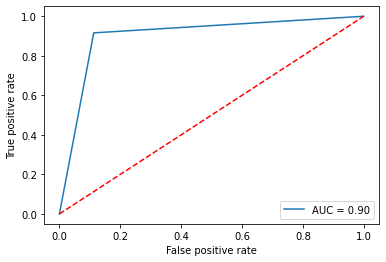

In [75]:
dt = DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

## KNN

max accuracy score corresponding to 73 is 96.58869395711501


cross validation score 79.66765578635015


Standard Deviation 1.84744257082983


F1 score 95.91919191919193


Training accuracy 97.83138401559455


Test Accuracy 95.07797270955166


Confusion Matrix [[ 764   87]
 [  14 1187]]


Classification Report               precision    recall  f1-score   support

           0       0.98      0.90      0.94       851
           1       0.93      0.99      0.96      1201

    accuracy                           0.95      2052
   macro avg       0.96      0.94      0.95      2052
weighted avg       0.95      0.95      0.95      2052



Roc_auc Score 94.30551900051955





73

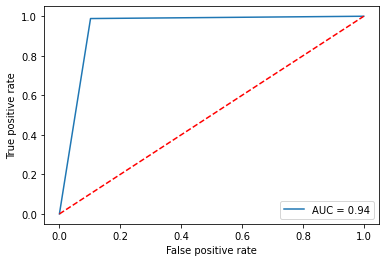

In [76]:
knn = KNeighborsClassifier()
max_accuracy_score(knn,x,y)

## Naive Bayes

max accuracy score corresponding to 55 is 82.60233918128655


cross validation score 77.29376854599407


Standard Deviation 4.887354761119082


F1 score 82.97320656871219


Training accuracy 80.3849902534113


Test Accuracy 80.79922027290448


Confusion Matrix [[698 153]
 [241 960]]


Classification Report               precision    recall  f1-score   support

           0       0.74      0.82      0.78       851
           1       0.86      0.80      0.83      1201

    accuracy                           0.81      2052
   macro avg       0.80      0.81      0.80      2052
weighted avg       0.81      0.81      0.81      2052



Roc_auc Score 80.97727021450007





55

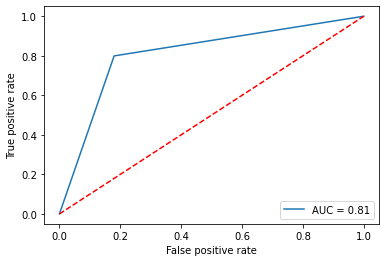

In [77]:
gnb = GaussianNB()
max_accuracy_score(gnb,x,y)

## Random Forest

max accuracy score corresponding to 73 is 96.9298245614035


cross validation score 85.43620178041543


Standard Deviation 1.108124868081548


F1 score 96.93200663349917


Training accuracy 100.0


Test Accuracy 96.39376218323586


Confusion Matrix [[ 809   42]
 [  32 1169]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.95      0.96       851
           1       0.97      0.97      0.97      1201

    accuracy                           0.96      2052
   macro avg       0.96      0.96      0.96      2052
weighted avg       0.96      0.96      0.96      2052



Roc_auc Score 96.20009177624209





73

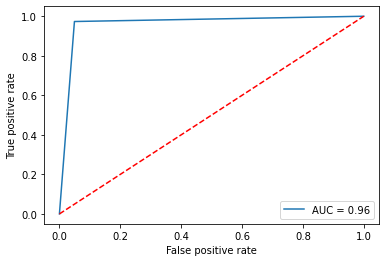

In [78]:
rf = RandomForestClassifier()
max_accuracy_score(rf,x,y)

## Ada Boost

max accuracy score corresponding to 49 is 87.67056530214425


cross validation score 81.2106824925816


Standard Deviation 2.723408447162552


F1 score 88.69492934330839


Training accuracy 87.1588693957115


Test Accuracy 86.74463937621833


Confusion Matrix [[ 713  138]
 [ 134 1067]]


Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       851
           1       0.89      0.89      0.89      1201

    accuracy                           0.87      2052
   macro avg       0.86      0.86      0.86      2052
weighted avg       0.87      0.87      0.87      2052



Roc_auc Score 86.31320746224992





49

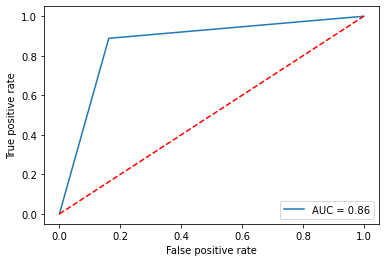

In [79]:
adb = AdaBoostClassifier()
max_accuracy_score(adb,x,y)

## Gradient Boost

max accuracy score corresponding to 73 is 91.61793372319687


cross validation score 81.57863501483679


Standard Deviation 3.6071370892211485


F1 score 91.95688225538973


Training accuracy 92.08089668615985


Test Accuracy 90.5458089668616


Confusion Matrix [[ 749  102]
 [  92 1109]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.88      0.89       851
           1       0.92      0.92      0.92      1201

    accuracy                           0.91      2052
   macro avg       0.90      0.90      0.90      2052
weighted avg       0.91      0.91      0.91      2052



Roc_auc Score 90.17690898008026





73

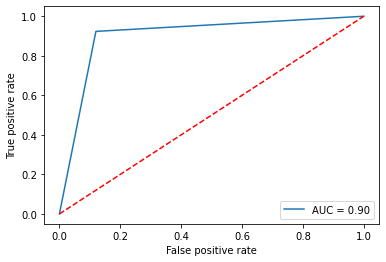

In [80]:
gb = GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

## Let's check ROC_AUC curve for fitted models:

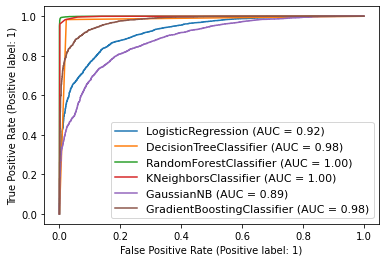

In [81]:
disp = plot_roc_curve(lr,x_resample,y_resample)
plot_roc_curve(dt,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(rf,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(knn,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gnb,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gb,x_resample,y_resample,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show();

The AUC curve of Gradient Boosting Classifier and Random Forest Classifier has covered 100% area under the curve.

the accuracy score of random forest classifier is almost 96.93 and as the difference of Accuracy Score and CV of Random Forest Classifier is very less but not least. But we are going to do hyperparameter tuning of RFC because the False positive number is the least for rfc. Hence, it's the best Model. Let's do Hyperparameter Tuning of RFC.

## Hyperparameter Tuning

In [82]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)

grid_param={'n_estimators':[12,13,15,17],
       'criterion':['entropy','gini'],
       'max_depth':[10,13,15,17],
       'min_samples_split':[10,12,11,13],
       'min_samples_leaf':[4,5,6,8]}

grid = GridSearchCV(rf,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 15}

In [83]:
rf_fin_clf =RandomForestClassifier(criterion='entropy',max_depth=15,min_samples_leaf=4,min_samples_split=10,n_estimators=15)
rf_fin_clf.fit(x_train,y_train)
pred=rf_fin_clf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
      
#####################TestScore##########################   
      
pred=rf_fin_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")      
      


=======================Train Result===========================
Accuracy score:98.63%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.987429     0.985450  0.986261     0.986439      0.986268
recall        0.979222     0.991219  0.986261     0.985221      0.986261
f1-score      0.983308     0.988326  0.986261     0.985817      0.986252
support    3369.000000  4783.000000  0.986261  8152.000000   8152.000000
________________________________________________________________
 Confusion Matrix:
[[3299   70]
 [  42 4741]]


=======================Test Result===========================
Accuracy score:93.04%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.932182     0.929153  0.930358     0.930668      0.930406
recall       0.896797     0.954013

After tuning with best parameters of Gradient Boosting Classifier,we have got best accuracy of 94.05%.

## Check the classification report for that.

In [84]:
Report = classification_report(y_test,pred)
print(Report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       843
           1       0.93      0.95      0.94      1196

    accuracy                           0.93      2039
   macro avg       0.93      0.93      0.93      2039
weighted avg       0.93      0.93      0.93      2039



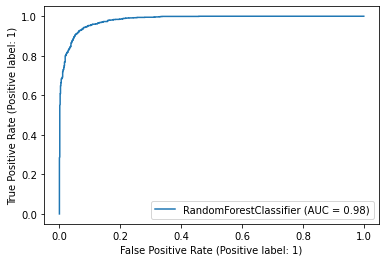

In [85]:
disp = plot_roc_curve(rf_fin_clf,x_test,y_test)

The AUC curve of Random Forest classiffier is covering 98% area under the curve.

In [86]:
x_predict = list (rf_fin_clf.predict(x_test))
rf_clf_insu = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_clf_insu))

      predicted_values  orignal_values
1678                 0               0
8220                 0               1
6691                 0               1
7239                 1               1
9231                 1               1
...                ...             ...
5671                 0               1
8048                 1               1
9290                 1               1
8051                 1               1
1695                 0               0

[2039 rows x 2 columns]


## Saving The Model

In [87]:
import joblib
joblib.dump(rf_fin_clf,"rand_clf_rainfall.pkl")

['rand_clf_rainfall.pkl']

## Loading Model

In [88]:
rf_from_joblib = joblib.load('rand_clf_rainfall.pkl')
rf_from_joblib.predict(x_test)

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)